# Hough lines

In [1]:
import numpy as np
from  matplotlib import pyplot as plt
import cv2 as cv

%matplotlib inline

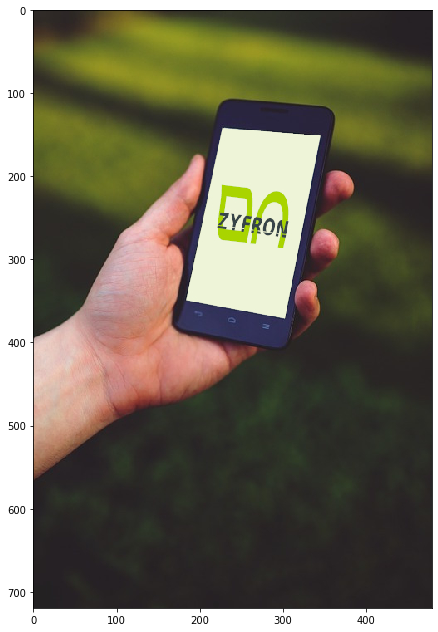

In [39]:
# read in the image
img = cv.imread('images/phone.jpg')

# change color to RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(8, 11))
plt.imshow(img)
plt.show()

## Perform edge detection and find lines using a Hough transform

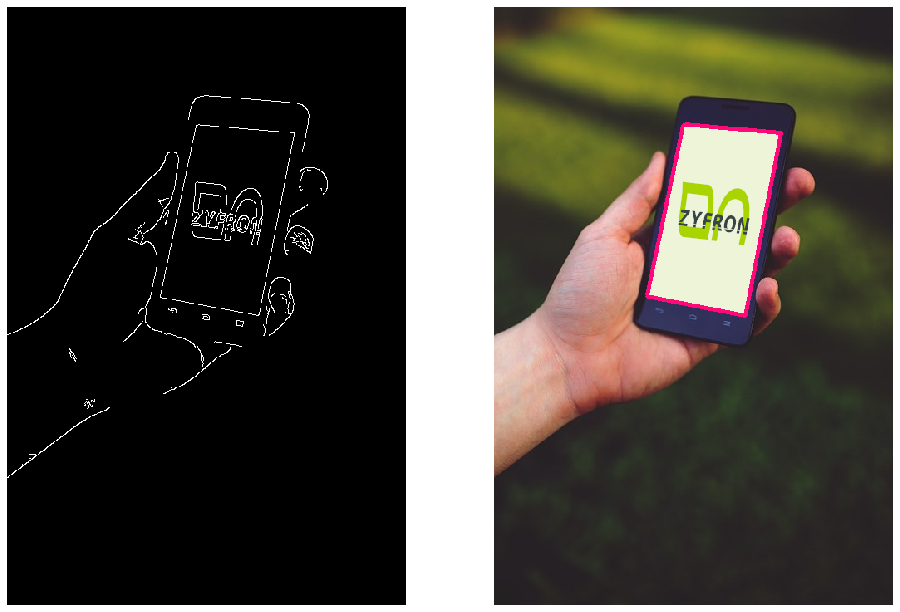

In [40]:
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# define parameters for Canny
low_threshold = 50
high_threshold = 150
edges = cv.Canny(gray, low_threshold, high_threshold)

# define the Hough transform parameters

# distance resolution of the accumulator in pixels
rho = 1
# angle resolution of the accumulator in radians
theta = np.pi / 180
# accumulator threshold parameter. Only those lines are returned that get enough votes
threshold = 70
# minimum line length. Line segments shorter than that are rejected
min_line_length = 105
# maximum allowed gap between points on the same line to link them
max_line_gap = 6


#creating an image copy to draw lines on
line_image = np.copy(img) 

# run Hough on the edge-detected image
# for 'lines' parameter, which is the output paramer simply supply None
# alternatively an empty numpy array is supplied i.e. np.array([])
lines = cv.HoughLinesP(edges, rho, theta, threshold, None, min_line_length, max_line_gap)

# iterate over the output "lines" and draw lines on the image copy
if lines is not None:
    for [[x1, y1, x2, y2]] in lines:
        cv.line(line_image, (x1, y1), (x2, y2), (255, 10, 120), 3)


plt.figure(figsize=(16, 11))

plt.subplot(121)
plt.axis('off')
plt.imshow(edges, cmap='gray')

plt.subplot(122)
plt.axis('off')
plt.imshow(line_image)
plt.show()